In [2]:
import pandas as pd

In [35]:
from datetime import datetime

In [36]:
from datetime import timedelta
import pandas.tseries.offsets
from pandas.tseries.offsets import Day, Hour, Second

### 필수과제1 
- 시계열데이터 문법
- offsets, first 직장인들 일하는 근로기준날, 첫 번째 월요일 등 추출 가능
- 구글링 하셔서 유용한 문법들을 최소 5개 이상 공유!

In [3]:
crime = pd.read_csv('/Users/seungwoo/Desktop/BDA/dataset/crime.csv')

In [4]:
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [6]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [7]:
#1 date_range()

ts = pd.date_range('2023-01-01',
                   periods= 6,
                   freq = 'M',
                   tz = 'Asia/Seoul')

In [8]:
ts

DatetimeIndex(['2023-01-31 00:00:00+09:00', '2023-02-28 00:00:00+09:00',
               '2023-03-31 00:00:00+09:00', '2023-04-30 00:00:00+09:00',
               '2023-05-31 00:00:00+09:00', '2023-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

In [9]:
#peroid_range

pr = pd.period_range(start= '2023-01-01',
                     end=None,
                     periods=3,
                     freq='M')
pr

PeriodIndex(['2023-01', '2023-02', '2023-03'], dtype='period[M]')

In [15]:
#dt. year
crime['Year'] = crime['REPORTED_DATE'].dt.year

In [16]:
#dt. month
crime['Month'] = crime['REPORTED_DATE'].dt.month

In [17]:
#dt.day
crime['Day'] = crime['REPORTED_DATE'].dt.day

In [18]:
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,Year,Day,Month
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1,2014,29,6
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0,2014,29,6
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0,2014,29,6
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0,2014,29,6
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0,2014,29,6


In [20]:
#to_period()를 통해 표기
crime['Date_yr'] = crime['REPORTED_DATE'].dt.to_period(freq='A')
crime['Date_m'] = crime['REPORTED_DATE'].dt.to_period(freq='M')
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,Year,Day,Month,Date_yr,Date_m
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1,2014,29,6,2014,2014-06
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0,2014,29,6,2014,2014-06
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0,2014,29,6,2014,2014-06
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0,2014,29,6,2014,2014-06
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0,2014,29,6,2014,2014-06


##  필수분석과제
- 고객 장바구니 데이터
- 시계열 데이터로 만들고 다양한 인사이트를 도출해 주세요! ' 시각화 필수 ' 
- 추가 분석 원하시는 분은 : 고객데이터 분석 RFM, 장바구니분석(apriori, Fb-growth), 비지도학습(클러스터링, k-means, gmm) 시각화 필수
- 주의사항 : 꼭 코드에 대한 주석처리 필수
- 분석 목적을 정확히 잡고 진행 주세요!

In [40]:
sales = pd.read_csv('/Users/seungwoo/Desktop/BDA/dataset/sales_data.csv', encoding='latin_1')
#데이터불러오기

In [41]:
sales.info(
  #데이터 정보파악
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [42]:
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])
#InvoiceDate datetime으로 변경

In [43]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [44]:
sales_=sales.set_index('InvoiceDate') #날짜열을 인덱스로 지정해 시계열데이터로 만들기

In [45]:
sales_

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


### 필수분석과제 sales 분석

#### 월별로 주문량에 차이가 있는지 확인

In [47]:
#2011년 data만 확인!
sales_2011 = sales_.loc['2011']
sales_2011

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom
2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom
2011-01-04 10:00:00,539993,21498,RED RETROSPOT WRAP,25,0.42,13313.0,United Kingdom
2011-01-04 10:00:00,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,13313.0,United Kingdom
2011-01-04 10:00:00,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


In [49]:
a = sales_2011.resample('1M').sum()
a

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_23322/2910983531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = sales_2011.resample('1M').sum()


,Quantity,UnitPrice,CustomerID
InvoiceDate,,,
2011-01-31,308966,172752.800,3.319198e+08
2011-02-28,277989,127448.770,3.117809e+08
2011-03-31,351872,171486.510,4.223298e+08
2011-04-30,289098,129164.961,3.541194e+08
2011-05-31,380391,190685.460,4.400088e+08
2011-06-30,341623,200717.340,4.264710e+08
2011-07-31,391116,171906.791,4.209226e+08
2011-08-31,406199,150385.680,4.219478e+08
2011-09-30,549817,199235.212,6.229373e+08


In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Monthly Quantity')

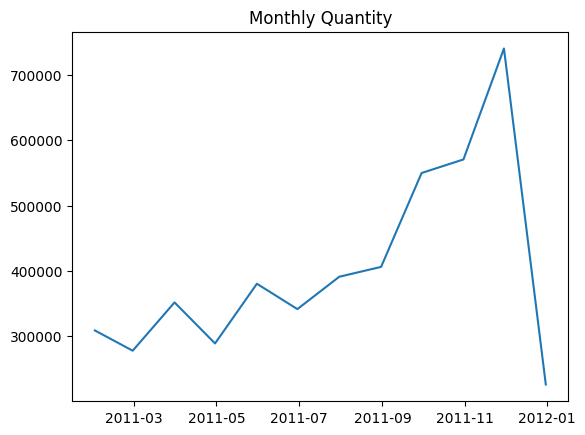

In [51]:
plt.plot(a['Quantity'])
plt.title('Monthly Quantity')
#달마다의 주문량 시각화해서 확인하기

### 월말에 주문량이 폭발적으로 증가한 것을 확인할 수 있다.
#### 2010년도 동일할까?라는 궁금점이 생겼다.

In [52]:
sales_2010 = sales_.loc['2010']
sales_2010

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2010-12-23 16:49:00,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,1.25,NaN,United Kingdom
2010-12-23 16:49:00,539991,72741,GRAND CHOCOLATECANDLE,4,1.45,NaN,United Kingdom
2010-12-23 17:41:00,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,3.75,NaN,United Kingdom


In [53]:
b = sales_2010.resample('1M').sum()
b

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_23322/3135713070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b = sales_2010.resample('1M').sum()


,Quantity,UnitPrice,CustomerID
InvoiceDate,,,
2010-12-31,342228,260520.85,416697748.0


### 2010년에는 12월 data만 존재해 비교하기 어렵다.

In [54]:
sales_

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


### 월별로 평균 구매가격도 궁금하다.

In [56]:
c = sales_2011.resample('1M').mean()
c

/var/folders/xs/tvgnm55s5xjd3wv7fc3m0bv80000gn/T/ipykernel_23322/3298070823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = sales_2011.resample('1M').mean()


,Quantity,UnitPrice,CustomerID
InvoiceDate,,,
2011-01-31,8.790679,4.915151,15147.853733
2011-02-28,10.033169,4.599876,15311.145705
2011-03-31,9.575269,4.666554,15179.705197
2011-04-30,9.663658,4.317588,15265.084404
2011-05-31,10.272509,5.149486,15221.004082
2011-06-30,9.264604,5.443330,15320.843189
2011-07-31,9.897161,4.350088,15305.162461
2011-08-31,11.512272,4.262149,15253.698503
2011-09-30,10.946860,3.966774,15259.842144


Text(0.5, 1.0, 'Monthly UnitPrice')

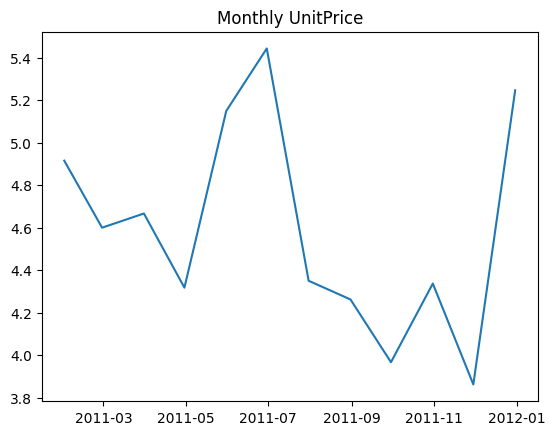

In [58]:
plt.plot(c['UnitPrice'])
plt.title('Monthly UnitPrice')

### 구매량은 연말에 급격히 감소한 것에 반해, 평균 가격은 급격히 증가한 양상을 파악할 수 있다.